# DEEP LEARNING PROJECT SYED MUHAMMAD ZAIN

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory = Path('/content/drive/MyDrive/Colab Notebooks/deep learning project/PSL DATA SET')
FileP = list(directory.glob(r'**/*.png'))

In [4]:
def proc_img(FP):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(FP[i]).split("/")[-2] \
              for i in range(len(FP))]

    fileP = pd.Series(FP, name='Filepath').astype(str)
    LBLS = pd.Series(labels, name='Label')

    
    df = pd.concat([fileP, LBLS], axis=1)

   
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(FileP)

print(f'No of pics in data: {df.shape[0]}\n')
print(f'No of labels: {len(df.Label.unique())}\n')
print(f'the labels: {df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
df.head(5)

No of pics in data: 1509

No of labels: 37

the labels: ['Noon ن' 'Daal ڈ' 'Tay ت' 'Laam ل' 'Fay ف' 'Seen س' 'Chhoti yeh ی'
 'Zay ز' 'Suaad ص' "Toay'n ط" 'Djay ژ' 'Kaaf ک' 'Thay ث' 'Jeem ج' 'Ain ع'
 'hey ح' 'Khay خ' 'Daal  د' 'Gaaf گ' 'Sheen \u200e\u200eش' 'Pay پ' 'Vao و'
 'Hamza \u200d\u200cء' 'Meem م' 'Aliph ا' 'Ray ر' "Zoay'n ظ" 'Bari yeh ے'
 'Dhaal ذ' 'Chay چ' 'Bay ب' 'Dhuaad ض' 'Quaaf ق' 'Hay ہ' 'Ghain غ'
 'aRay ڑ' 'Tey ٹ']


,Filepath,Label
0,/content/drive/MyDrive/Colab Notebooks/deep le...,Noon ن
1,/content/drive/MyDrive/Colab Notebooks/deep le...,Daal ڈ
2,/content/drive/MyDrive/Colab Notebooks/deep le...,Tay ت
3,/content/drive/MyDrive/Colab Notebooks/deep le...,Laam ل
4,/content/drive/MyDrive/Colab Notebooks/deep le...,Tay ت


<Figure size 1440x864 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


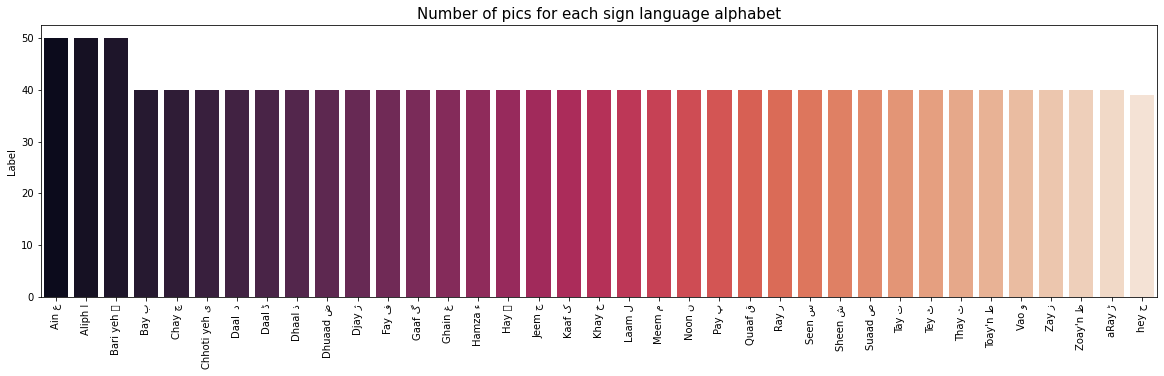

In [5]:
plt.figure(figsize=(20,12))
valuesofthelabels = df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(valuesofthelabels.index), y = valuesofthelabels, palette = "rocket")
plt.title("Number of pics for each sign language alphabet", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

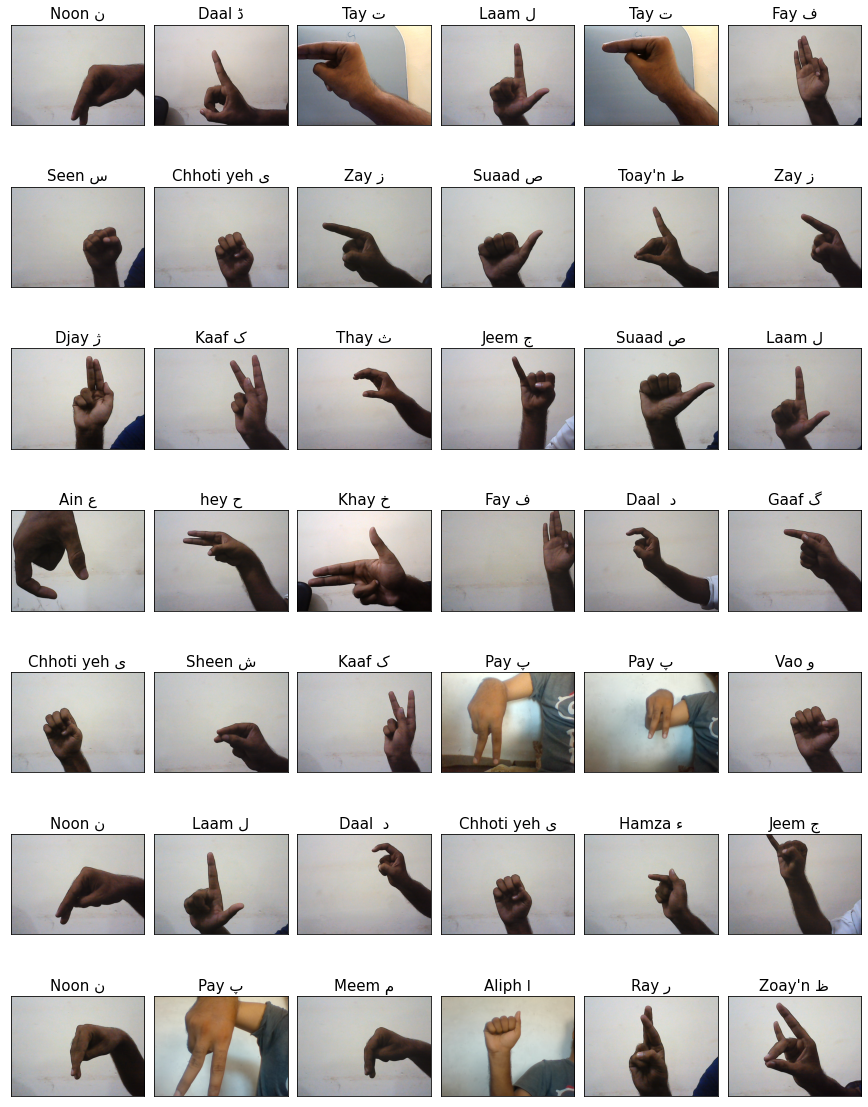

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(12, 16),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

In [7]:
trainingdataframe, testingdataframe = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
def create_gen():
    
    traingen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    testgen= tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    trainingimages = traingen.flow_from_dataframe(
        dataframe=trainingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
         rotation_range=30, 
         zoom_range=0.15,
         width_shift_range=0.2,
         height_shift_range=0.2,
         shear_range=0.15,
         horizontal_flip=True,
         fill_mode="nearest"
    )

    validationimages = traingen.flow_from_dataframe(
        dataframe=trainingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30, 
         zoom_range=0.15,
         width_shift_range=0.2,
         height_shift_range=0.2,
         shear_range=0.15,
         horizontal_flip=True,
         fill_mode="nearest"
    )

    testingimages = testgen.flow_from_dataframe(
        dataframe=testingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return traingen,testgen,trainingimages,validationimages,testingimages

In [9]:
traingen,testgen,trainingimages,validationimages,testingimages=create_gen()

Found 1087 validated image filenames belonging to 37 classes.
Found 120 validated image filenames belonging to 37 classes.
Found 302 validated image filenames belonging to 37 classes.


In [10]:
def get_model(model):

    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    preTM = model(**kwargs)
    preTM.trainable = False
    
    inputs = preTM.input

    x = tf.keras.layers.Dense(128, activation='relu')(preTM.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(37, activation='softmax')(x)

    Fmodel = tf.keras.Model(inputs=inputs, outputs=outputs)

    Fmodel.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return Fmodel

In [11]:
# Dictionary with the models
models = {
    "DN121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MBV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DN169": {"model":tf.keras.applications.DenseNet169, "perf":0},
    "DN201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "ENB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "ENB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "ENB2": {"model":tf.keras.applications.EfficientNetB2, "perf":0},
    "ENB3": {"model":tf.keras.applications.EfficientNetB3, "perf":0},
    "ENB4": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "ENB5": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "ENB6": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "ENB7": {"model":tf.keras.applications.EfficientNetB4, "perf":0},
    "IRNV2": {"model":tf.keras.applications.InceptionResNetV2, "perf":0},
    "INV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MB": {"model":tf.keras.applications.MobileNet, "perf":0},
    "MBV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MBV3L": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "MBV3S": {"model":tf.keras.applications.MobileNetV3Small, "perf":0},
    "NNM" :{"model":tf.keras.applications.NASNetMobile, "perf":0},
    "RN101": {"model":tf.keras.applications.ResNet101, "perf":0},
    "RN101V2": {"model":tf.keras.applications.ResNet101V2, "perf":0},
    "RN152": {"model":tf.keras.applications.ResNet152, "perf":0},
    "RN152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "RN50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "RN50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "X": {"model":tf.keras.applications.Xception, "perf":0}
}

# Create the generators
traingen,testgen,trainingimages,validationimages,testingimages=create_gen()
print('\n')

# Fit the models
for N, M in models.items():
    
    # Get the model
    m = get_model(M['model'])
    models[N]['model'] = m
    
    start = perf_counter()
    
    # Fit the model
    hist = m.fit(trainingimages,validation_data=validationimages,epochs=1,verbose=0)
    
    # Sav the duration and the val_accuracy
    dur = perf_counter() - start
    dur = round(dur,2)
    models[N]['perf'] = dur
    print(f"{N:20} trained in {dur} sec")
    
    val_acc = hist.history['val_accuracy']
    models[N]['val_acc'] = [round(v,4) for v in val_acc]

Found 1087 validated image filenames belonging to 37 classes.
Found 120 validated image filenames belonging to 37 classes.
Found 302 validated image filenames belonging to 37 classes.


29089792/29084464 [==============================] - 1s 0us/step
DN121                trained in 533.44 sec
9412608/9406464 [==============================] - 0s 0us/step
MBV2                 trained in 56.33 sec
51879936/51877672 [==============================] - 1s 0us/step
DN169                trained in 197.72 sec
74842112/74836368 [==============================] - 1s 0us/step
DN201                trained in 260.6 sec
16711680/16705208 [==============================] - 0s 0us/step
ENB0                 trained in 83.31 sec
27025408/27018416 [==============================] - 0s 0us/step
ENB1                 trained in 117.6 sec
31793152/31790344 [==============================] - 0s 0us/step
ENB2                 trained in 130.27 sec
43941888/43941136 [==============================] - 1s 0us/step

In [12]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1], 
                          models[name]['perf']])
    
dataframeresults = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','Training time (sec)'])
dataframeresults .sort_values(by='val_accuracy', ascending=False, inplace=True)
dataframeresults .reset_index(inplace=True,drop=True)
dataframeresults 

,model,val_accuracy,Training time (sec)
0,RN152V2,0.9000,436.72
1,RN101V2,0.9000,304.04
2,MB,0.8667,55.26
3,X,0.8583,232.39
4,NNM,0.8167,144.87
5,RN50V2,0.8083,155.92
6,MBV2,0.7750,56.33
7,DN201,0.7583,260.60
8,INV3,0.6167,126.24
9,DN121,0.6000,533.44


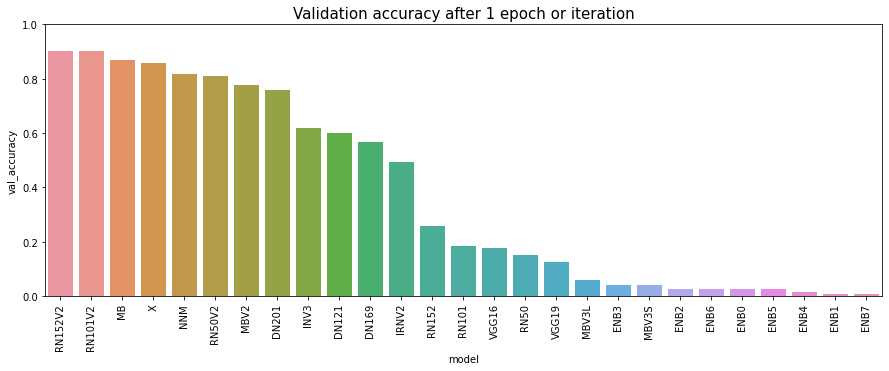

In [13]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'val_accuracy', data = dataframeresults)
plt.title('Validation accuracy after 1 epoch or iteration', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

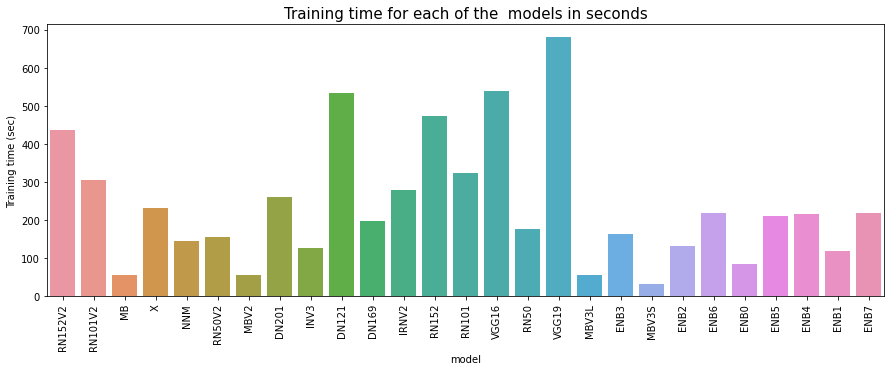

In [14]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = dataframeresults)
plt.title('Training time for each of the  models in seconds', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [18]:
bestmodel = dataframeresults.iloc[0]
bestmodel

model                  RN152V2
val_accuracy               0.9
Training time (sec)     436.72
Name: 0, dtype: object

In [19]:
# Use the whole data which is split into training and test datasets
trainingdataframe, testingdataframe = train_test_split(df, test_size=0.1, random_state=0)


traingen,testgen,trainingimages,validationimages,testingimages=create_gen()


model = get_model( eval("tf.keras.applications."+ "ResNet152V2") )

hist= model.fit(trainingimages,
                    validation_data=validationimages,
                    epochs=10,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=1,
                            restore_best_weights=True)]
                    )

Found 1223 validated image filenames belonging to 37 classes.
Found 135 validated image filenames belonging to 37 classes.
Found 151 validated image filenames belonging to 36 classes.
Epoch 1/10
39/39 [==============================] - 522s 13s/step - loss: 2.7922 - accuracy: 0.3083 - val_loss: 0.5181 - val_accuracy: 0.9407
Epoch 2/10
39/39 [==============================] - 499s 13s/step - loss: 0.3516 - accuracy: 0.9415 - val_loss: 0.0997 - val_accuracy: 0.9852
Epoch 3/10
39/39 [==============================] - 488s 13s/step - loss: 0.0914 - accuracy: 0.9933 - val_loss: 0.0640 - val_accuracy: 0.9926
Epoch 4/10
39/39 [==============================] - 479s 12s/step - loss: 0.0410 - accuracy: 0.9983 - val_loss: 0.0388 - val_accuracy: 0.9926
Epoch 5/10
39/39 [==============================] - 482s 12s/step - loss: 0.0205 - accuracy: 0.9997 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 481s 12s/step - loss: 0.0156 - accuracy: 1.0000 - val_

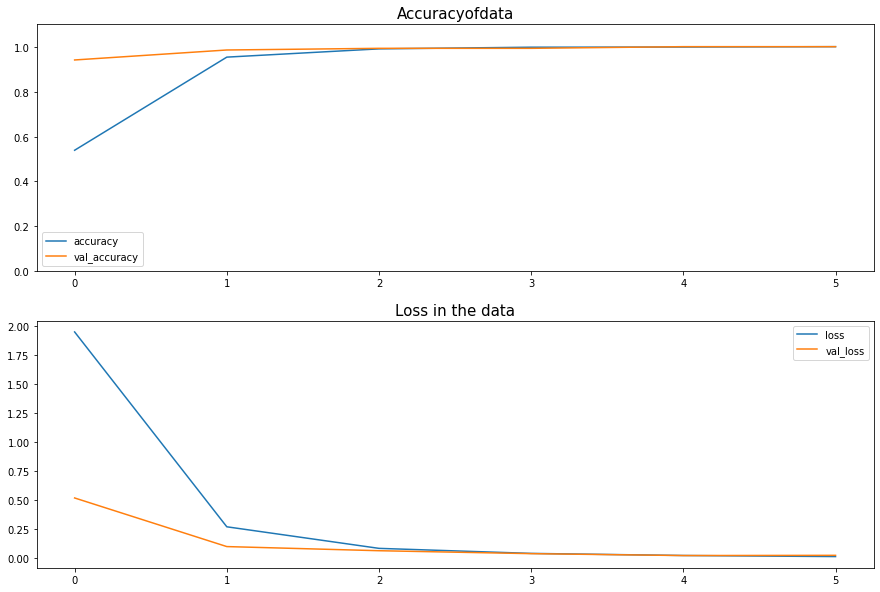

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(hist.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracyofdata", fontsize = 15)
ax[0].set_ylim(0,1.1)

pd.DataFrame(hist.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_title("Loss in the data", fontsize = 15)
plt.show()

##The Best Transfer Learning model is: RN152V2 with 97.35% accuracy on the test set

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


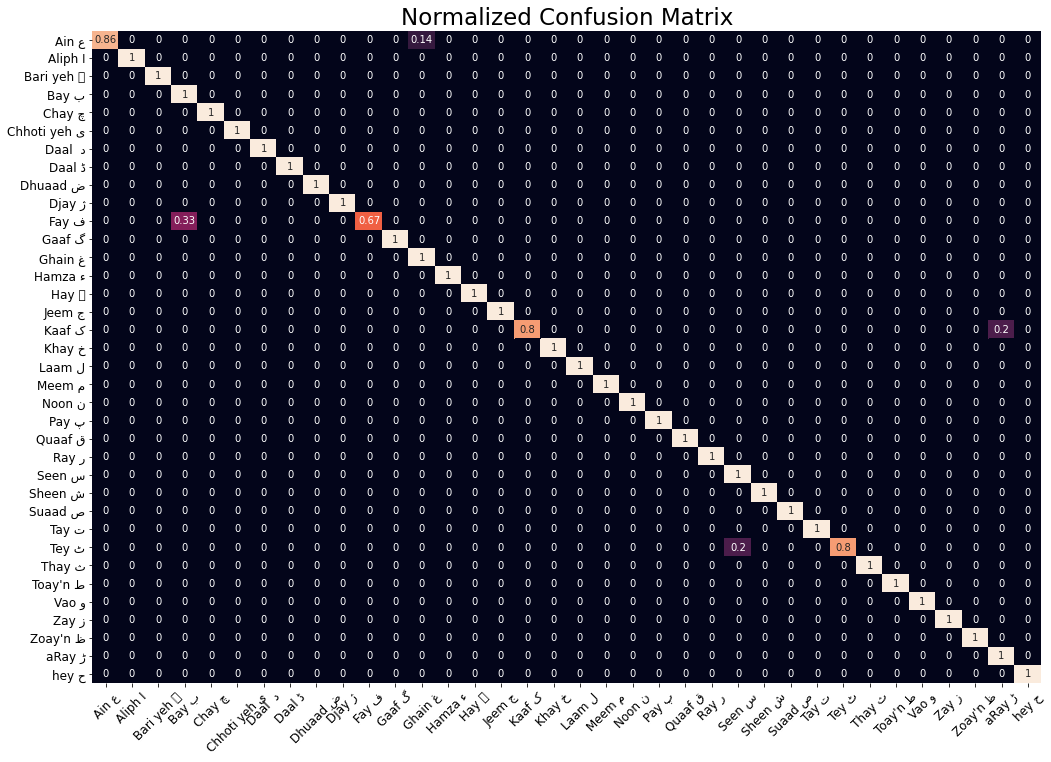

In [25]:
predictions = model.predict(testingimages)
predictions = np.argmax(predictions,axis=1)

# Map the label
labels = (trainingimages.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predictions]

# Get the accuracy on the test set
YTEST = list(testingdataframe.Label)
accuracy = accuracy_score(YTEST,predictions)

# Display the results
printmd(f'##The Best Transfer Learning model is: {bestmodel[0]} with {accuracy*100:.2f}% accuracy on the test set')

# Display a confusion matrix
confusionmatrix1= confusion_matrix(YTEST, predictions, normalize='true')
plt.figure(figsize = (17,12))
sns.heatmap(confusionmatrix1, annot=True, xticklabels = sorted(set(YTEST)), yticklabels = sorted(set(YTEST)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


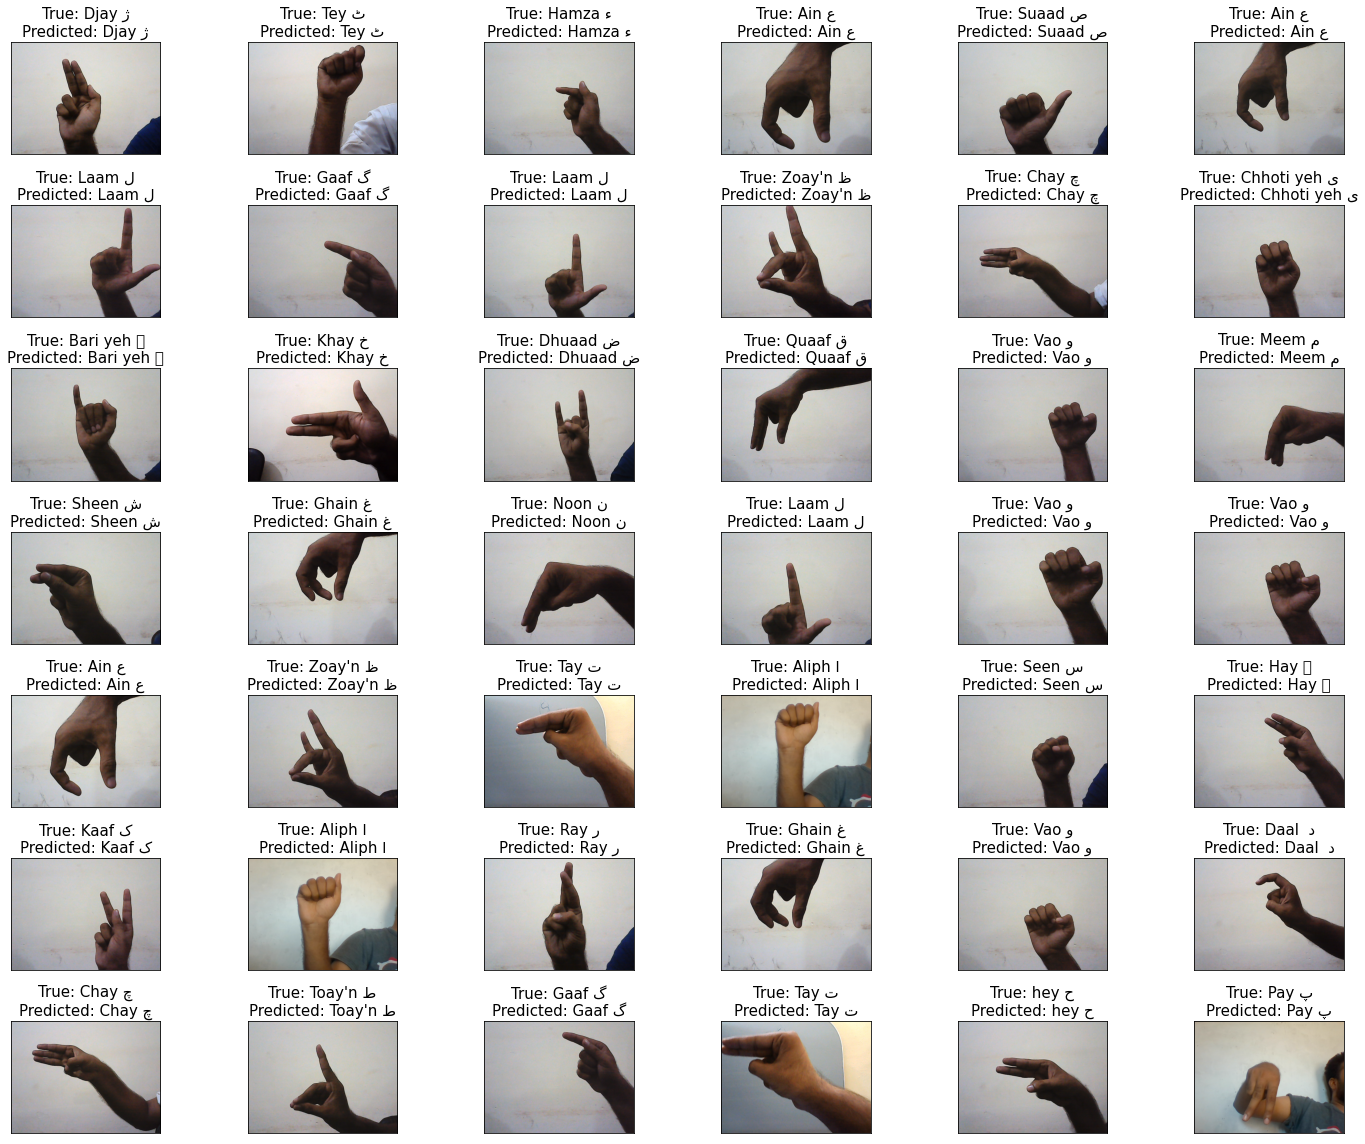

In [29]:
# Display picture of the dataset with their labels
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(20, 16),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(testingdataframe.Filepath.iloc[i]))
    ax.set_title(f"True: {testingdataframe.Label.iloc[i].split('_')[0]}\nPredicted: {predictions[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()